# Seaborn

Statistical plotting library built on top of Matplotlib, thus, often few lines are enough!
Designed to work with pandas.
Really nice visualizations, look at the gallery online:

[Seaborn Official Gallery](https://seaborn.pydata.org/examples/index.html)

Install:

```python
conda install seaborn
pip install seaborn
```

Overview of sections:

1. Distribution plots
2. Categorical plots
3. Matrix plots: heatmaps & clustermaps
4. Grids
5. Regression plots
6. Style and color


## 1. Distribution Plots

In [1]:
import seaborn as sns
%matplotlib inline

In [7]:
# Seaborn comes with built-in test datasets (often pandas data frames)
# Example: tips
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


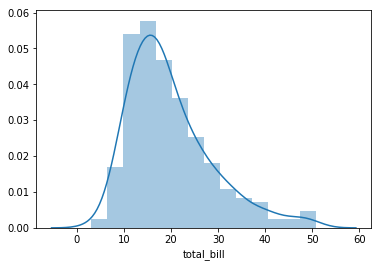

In [12]:
# Plot uni-variate distributions as histograms & kdes
# KDE: Kernel-density estimation: a curve is shown; we can de-activate it with kde=False
sns.distplot(tips['total_bill']) # kde=False

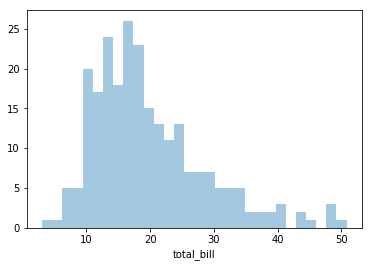

In [16]:
# Change number of bins
# Switch off kde: counts shown instead of density, and curve not visualized
sns.distplot(tips['total_bill'],bins=30,kde=False)

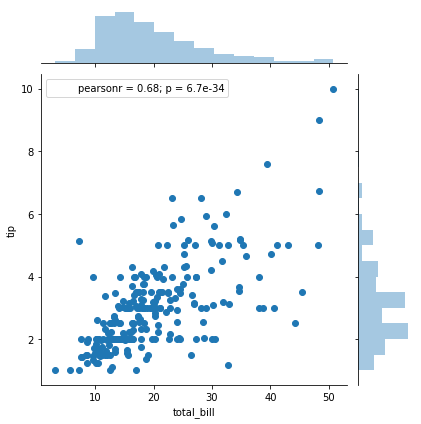

In [19]:
# Plot bi-variate data: scetterplot + X & Y histograms + Pearson
# x='col1', y='col2', data=DataFrame
sns.jointplot(x='total_bill',y='tip',data=tips)

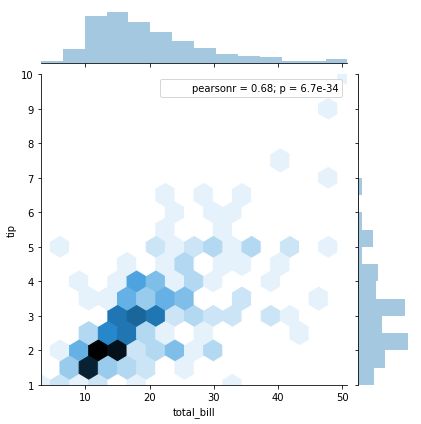

In [20]:
# We can change the scatterplot to be a hex plot with kind, or other types of plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

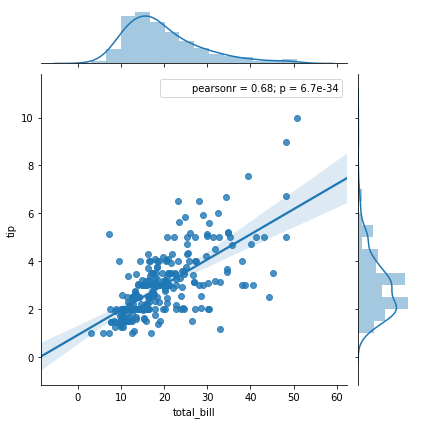

In [22]:
# kind='reg': linear regression fit!
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

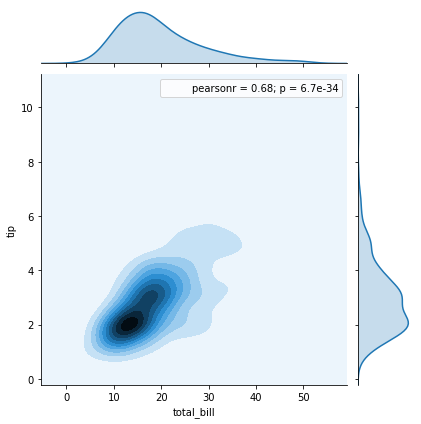

In [24]:
# kind='kde': distribution estimation!
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

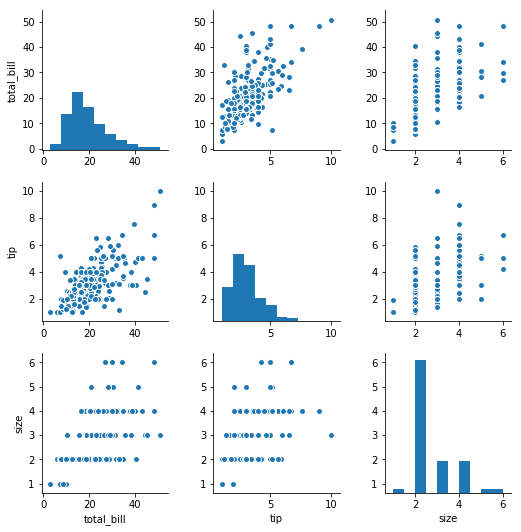

In [26]:
# Pair-plots: joint plots for all numerical pair combinations in data frame
# Very nice overview of the dataset!
sns.pairplot(tips)

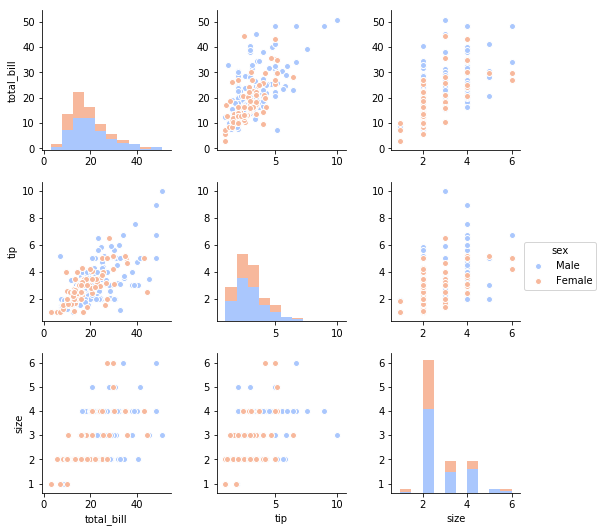

In [30]:
# Pair-plots + Hue: overlap effect of categorical values!
# We pass the name of a column that contains categorical data
# palette: there is a set of color combinations & styles we can use
sns.pairplot(tips,hue='sex',palette='coolwarm')

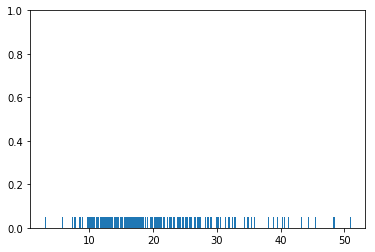

In [32]:
# Rug plots: density dash marks along X distrubution lines
sns.rugplot(tips['total_bill'])

**Kernel Desity Estimation Plots = KDEs**

Method for estimating the underlying distribution of a sampled dataset.

Basically, a **kernel** function $K(x)$ is chosen (commonly, $K$ is the normal distrbution), and set on each of the dashes of the **rug plot**. Then, these kernels are summed up to obtain the estimated distribution:

$KDE = \frac{1}{nh}\sum_i{K(\frac{x-x_i}{h})}$

An important parameter is the **bandwidth** $h$, or smoothing parameter: if too small, no smoothing, if too big, over-smoothened.

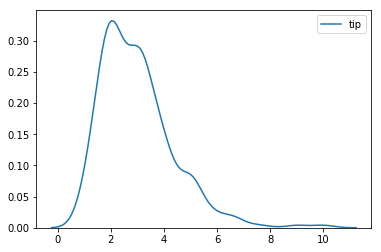

In [33]:
# KDE of a sampled dataset
sns.kdeplot(tips['tip'])

## 2. Categorical Plots

In [37]:
import seaborn as sns
import numpy as np
%matplotlib inline
tips = sns.load_dataset('tips')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


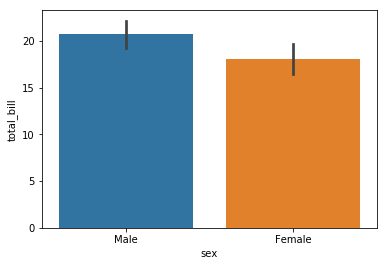

In [36]:
# Barplot
# x='cat1', y='continuous', data=DataFrame
# estimator: aggregator function applied to y; default is mean
sns.barplot(x='sex',y='total_bill',data=tips)

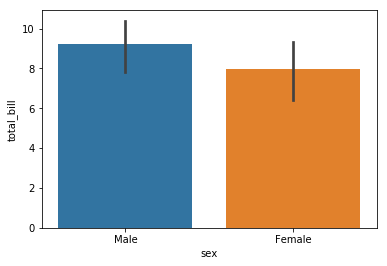

In [40]:
# estimator: aggregator function applied to y; default is mean
# we can pass any function as estimator aggregator, eg np.std
# then, continuous values of categories are aggregated with the estimator
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

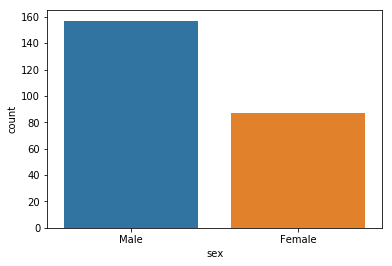

In [41]:
# Countplot: barplot with estimator=count
sns.countplot(x='sex',data=tips)

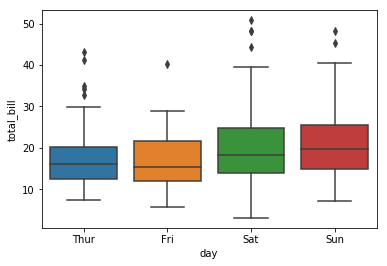

In [42]:
# Boxplot
sns.boxplot(x='day',y='total_bill',data=tips)

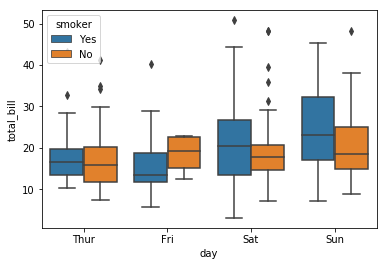

In [44]:
# Boxplot with hue (2 categories/layers)
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')

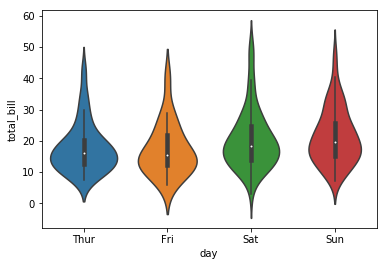

In [48]:
# Violin plot: fancy boxplots with density estimations
sns.violinplot(x='day',y='total_bill',data=tips)

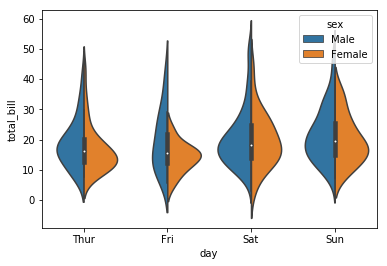

In [51]:
# Violin plot with hue and split: very interesting!
# Male & Female distributions plotted for each day category!
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

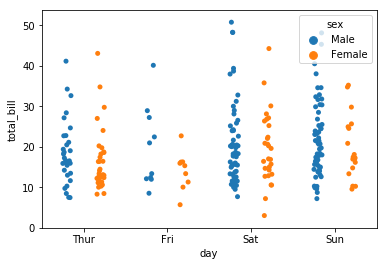

In [58]:
# Strip plot: rug plot with points for different categories
# with jitter=True we separate points horizontally with random noise for better visualization
# we can also add hue to have layers/categories
# hue + dodge=True separates hue layers; dodge used to t´be split
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex', dodge=True)

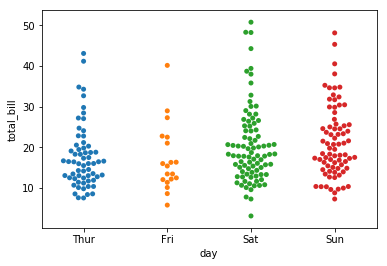

In [60]:
# Swarm plot: strip plot + violin plot = points scattered following density distribution
# Sometimes it doesn't scale for large datasets
sns.swarmplot(x='day',y='total_bill',data=tips)

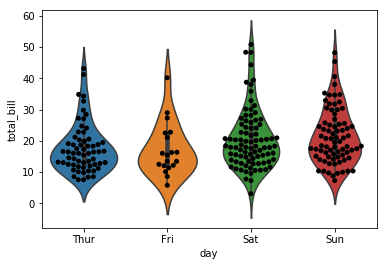

In [62]:
# Combining plots, eg: violin plot + swarm plot
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

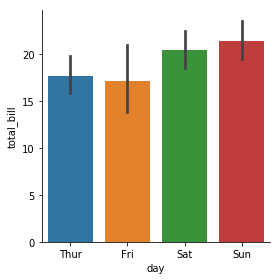

In [63]:
# Factor plots:
# general interface which takes kind as argument
# specifying which kind of plot we'd like: bar, box, etc
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

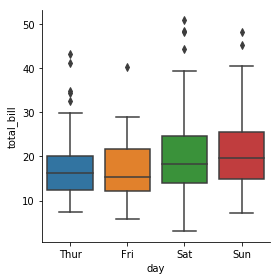

In [64]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='box')

## 3. Matrix Plots: Heatmaps & Clustermaps

We have mainly 2 options:

- Hetmaps: we pass a matrix and the value of each cell is colored
- Clustermaps: we pass a matrix and cells are grouped by similarity + colored

In [65]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [66]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
# Number of passengers that flew on a given month of a year
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [69]:
# In order to plot matrices
# both rows and cols must have the same meaning!
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [70]:
tc = tips.corr()

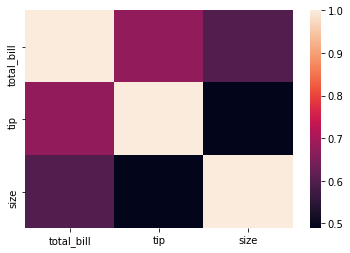

In [73]:
# Heatmap of correlations
sns.heatmap(tc)

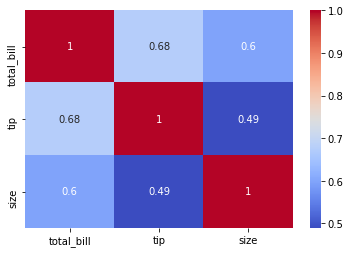

In [75]:
# Heatmap with params
# value annotations and colormap
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [76]:
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [77]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [79]:
# To convert a dataset into a matrix, we often use the pivot_table function
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [80]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

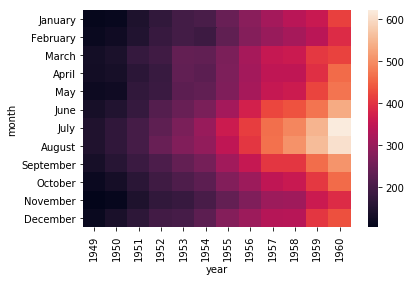

In [81]:
sns.heatmap(fp)

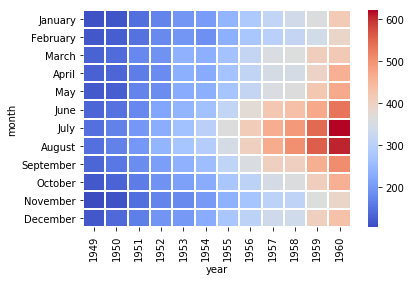

In [83]:
# Options
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidth=1)

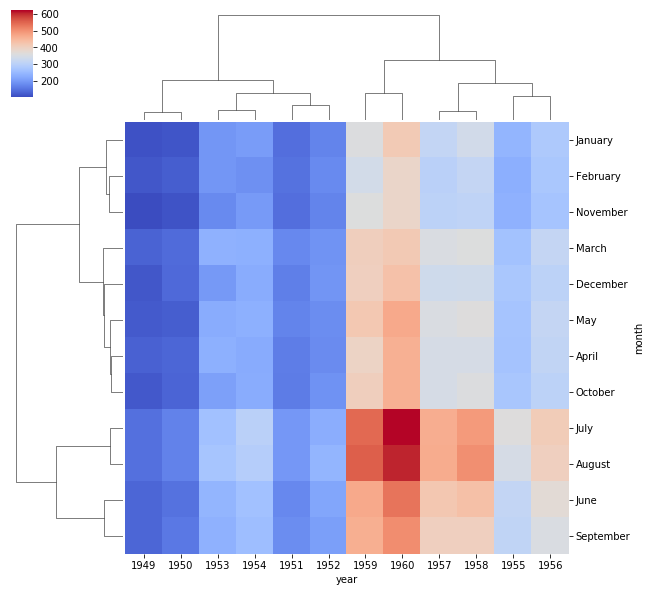

In [100]:
# Clustermaps: rows and cols are clustered together based on the value similatity
# It makes sense to use a cmap like coolwarm
# What does the option standard_scale=1 do??
sns.clustermap(fp,cmap='coolwarm')

## 4. Grids

In [110]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# Iris flowers' dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
# 3 species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

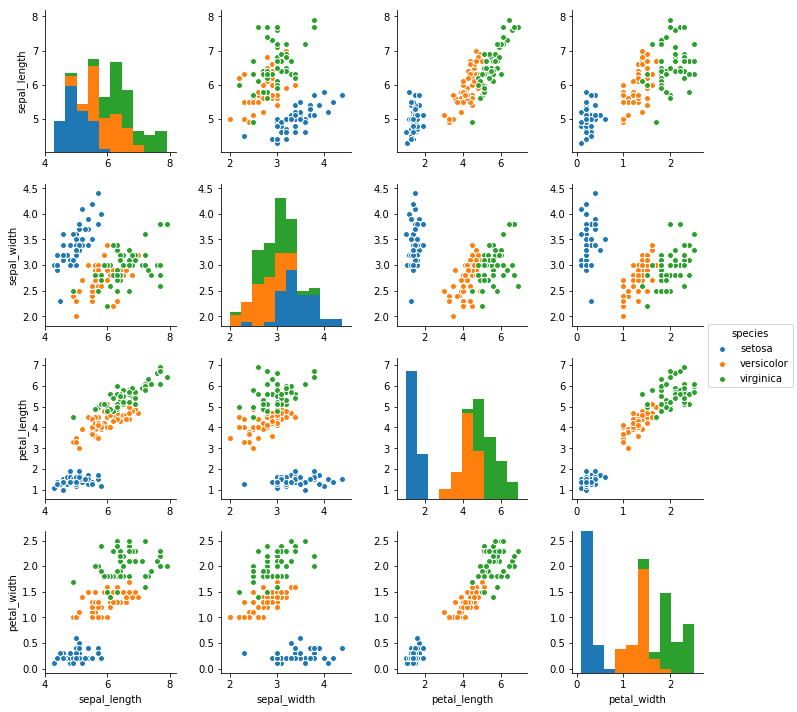

In [105]:
sns.pairplot(data=iris,hue='species')

### PairGrid

`PairGrid` is like `pairplot` but we specify which plot types should be applied.

/Users/mxagar/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


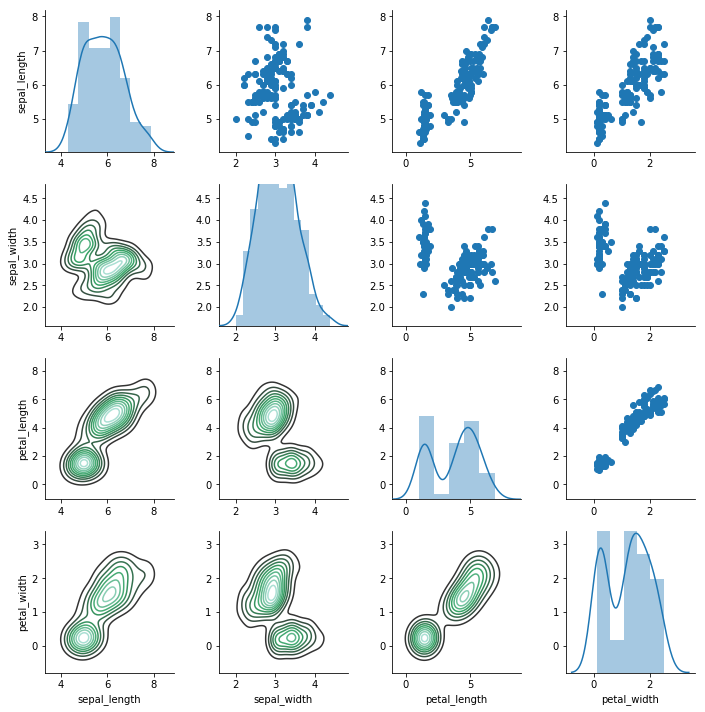

In [112]:
g = sns.PairGrid(iris) # empty plots with axes created
# g.map(plt.scatter) # we would get a scatterplot for each cell
g.map_diag(sns.distplot)
g.map_upper(plt.scatter) # note we pass matplotlib plot type!
g.map_lower(sns.kdeplot)

In [113]:
tips = sns.load_dataset('tips')

In [114]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### FacetGrid

Similar to `PairGrid`, buut now we basically have categories in row & cols.

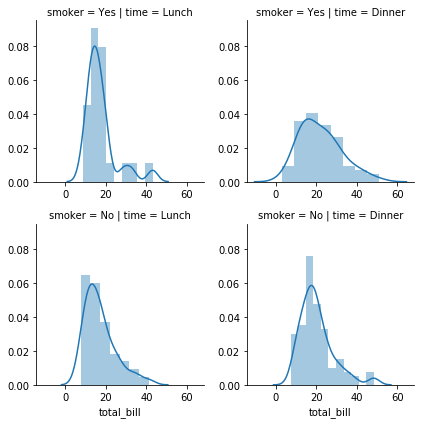

In [117]:
# We saparate dataset in two factors: col='time' (Lunch, Dinner), row='smoker' (Yes, No)
# For each 2x2 combination, we plot drictribution of 'total_bill'
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

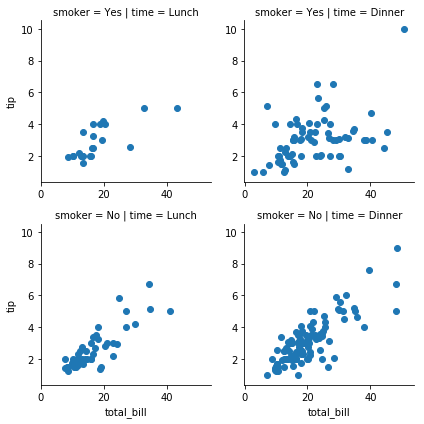

In [120]:
# We can plot anaything really, eg scatterplots, which require 2 arguments passed to map()
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

## 5. Regression Plots

In [121]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


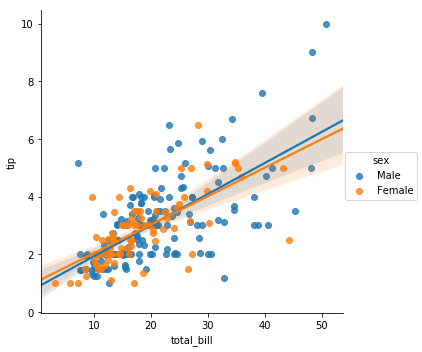

In [124]:
# lm: Linear Model
# We basically specify x,y, and optionally hue layers
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

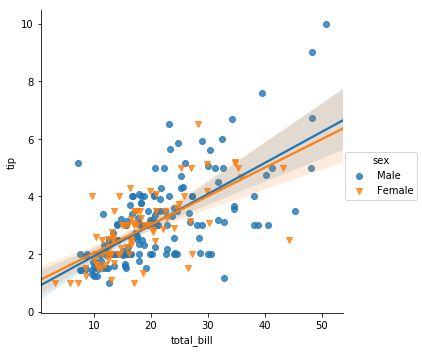

In [125]:
# We can pass matplotlib parameters: markers
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

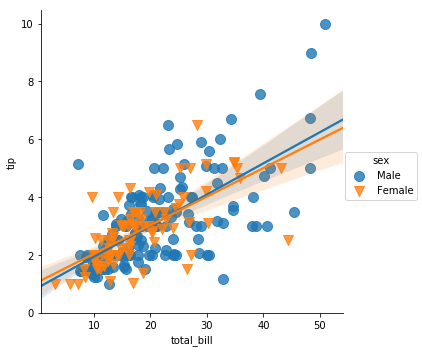

In [129]:
# We can pass matplotlib parameters: each plot type has its ways, look at the docs
# Here, we pass scatter_kws, which is a dictionary with options
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})

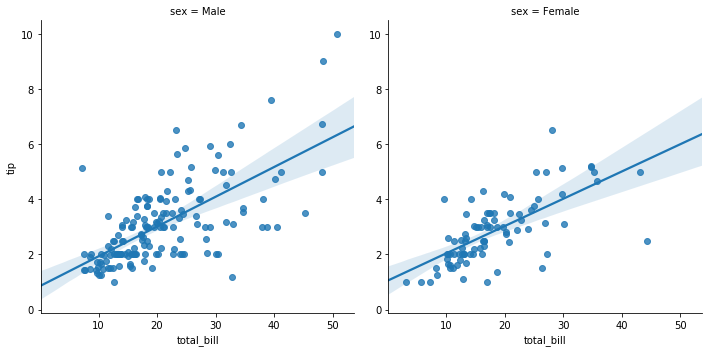

In [132]:
# Instead of using hue layers/factors, we can use col and have different rows & cols!
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

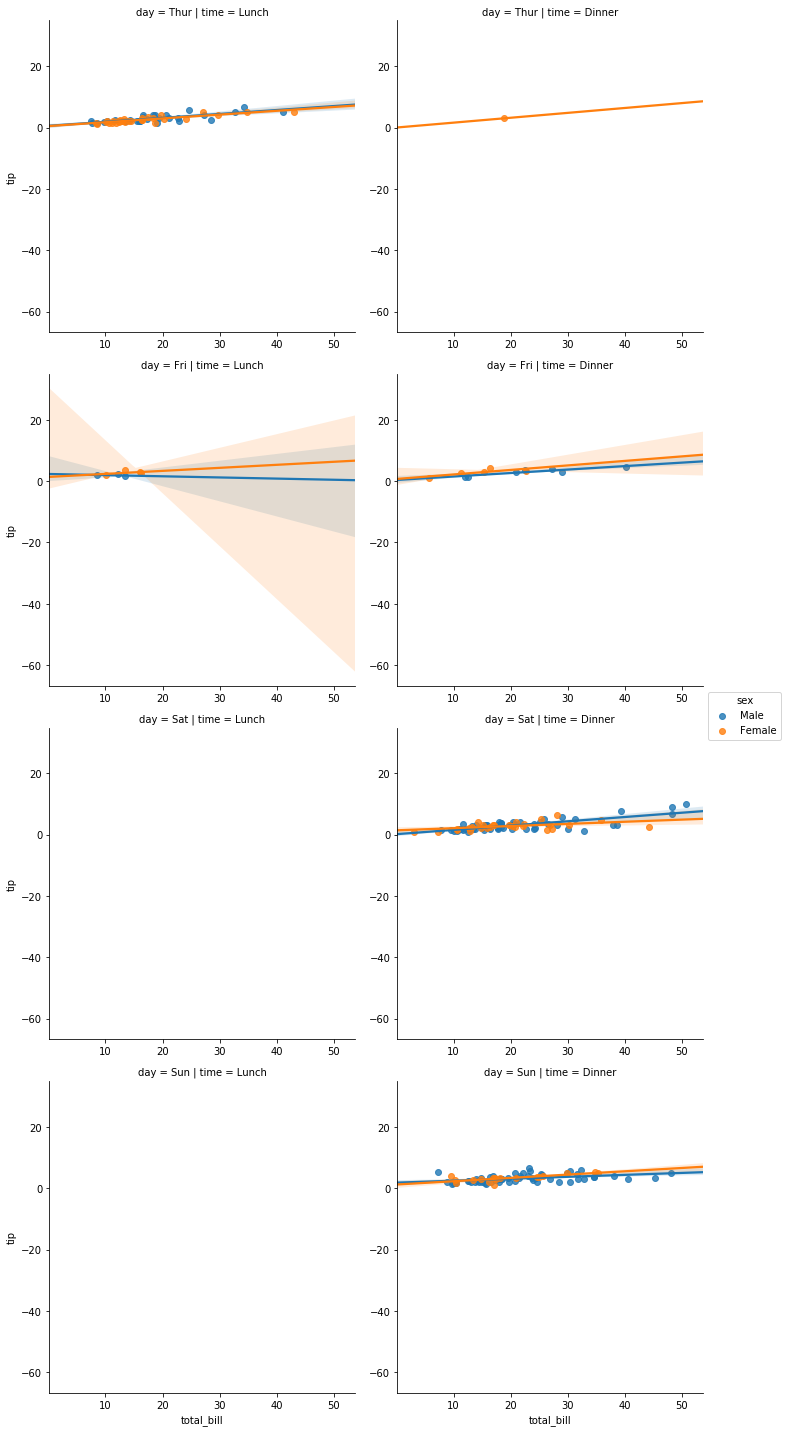

In [134]:
# We can also add hue!
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',col='time',row='day')

## 6. Style and Color

In [135]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


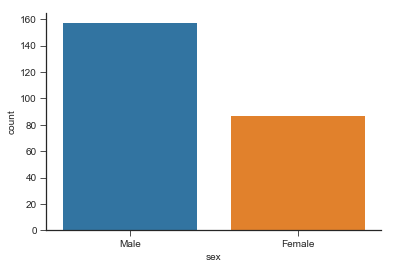

In [143]:
# We can pass different style types
# Shift + TAB
# style = darkgrid, whitegrid, dark, white, ticks
# rc: dict with overriding params for styles
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(top=True) # we can remove spines or lines

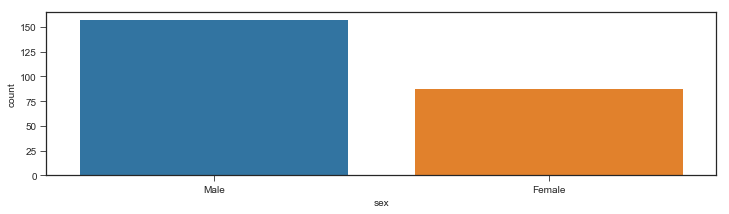

In [146]:
# Change figure size
plt.figure(figsize=(12,3)) # we can set figure size with plt, because sns uses it!
sns.countplot(x='sex',data=tips)

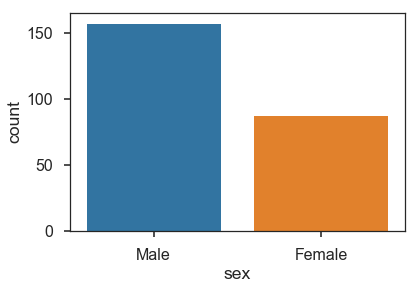

In [148]:
# We can modfy sizes with set_context
# With option font_scale, we can even control more the font scaling
sns.set_context('poster') # notebook < paper < talk < poster
sns.countplot(x='sex',data=tips)

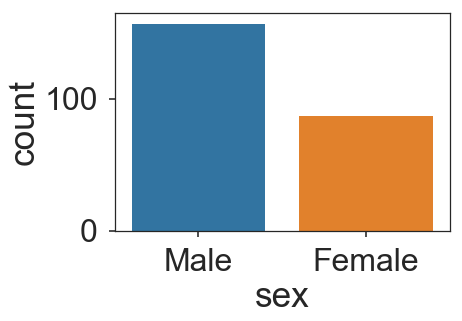

In [150]:
# With option font_scale, we can even control more the font scaling
sns.set_context('poster', font_scale=2)
sns.countplot(x='sex',data=tips)

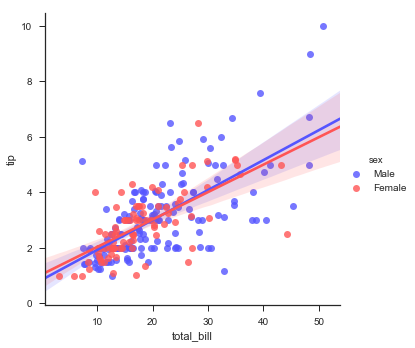

In [156]:
# Palettes and colors
# We can pass matplotlib colormaps to palette
# https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
sns.set_context('notebook', font_scale=1)
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')